In [43]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Lasso, OrthogonalMatchingPursuit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

%matplotlib inline

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[-3.27540339e-04  1.07419537e-01  2.17441025e-01  3.05310440e-01
  4.02489996e-01  5.20279908e-01  5.94828333e-01  7.03853328e-01
  8.14531225e-01  9.18108697e-01  9.73761542e-03]


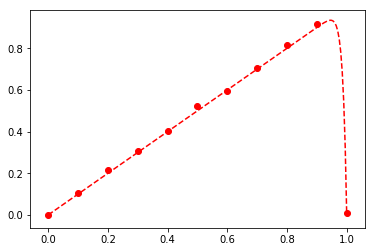

In [53]:
n = 200
t = np.linspace(0,1,n)
#print(x)
x = np.arange(0, 1.1, step=0.1)
random_x = np.random.choice(t, 200,replace = False)
pickedup_x = np.sort(random_x)
ty = pickedup_x - pickedup_x**80 
y = x - x**80 + np.random.normal(loc=0.01, scale=0.01, size=len(x))
print(x)
print(y)
#plt.xlim([-np.pi,np.pi])
#plt.ylim([-10,10])
plt.plot(t,ty,c="red",linestyle="--")
plt.scatter(x,y,c="red")

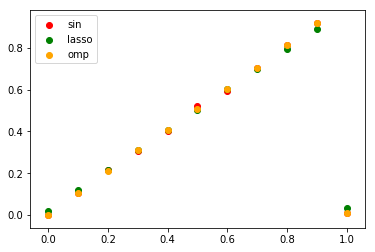

In [61]:
#create model
lin = LinearRegression() 
lasso = Lasso(alpha=0.002,max_iter=500000,tol=0.000001) 
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=5)

X_train = x.reshape([-1,1])
#y_train = np.sin(pickedup_x).reshape([-1,1])
y_train = y.reshape([-1,1])
#print(X_train)
#print(y_train)

poly = PolynomialFeatures(degree=80,include_bias =False)
X_poly = quad.fit_transform(X_train)
lin_poly = make_pipeline(poly,lin) 
lasso_poly = make_pipeline(poly,lasso)
omp_poly = make_pipeline(poly,omp) 

#normal training
lin_poly.fit(X_train,y)
lasso_poly.fit(X_train,y)
omp_poly.fit(X_train,y)

#prediction
#lin_pred = lin.predict(X_train)
#lasso_pred = lasso.predict(X_train)
#omp_pred = omp.predict(X_train)

lin_pipe_pred = lin_poly.predict(X_train)
lasso_pipe_pred = lasso_poly.predict(X_train)
omp_pipe_pred = omp_poly.predict(X_train)


#print(lin_pred)
#print(lin_pred.reshape(len(X_train)))
#plot
#print(X_poly.shape,lin_pred.shape)
#plt.xlim([0,2*np.pi])
#plt.ylim([-1,1])
plt.scatter(X_train,y_train,label="lin",c="blue")
#plt.plot(X_train,lin_pipe_pred.reshape(len(X_train)),label="lin",c="blue")
plt.scatter(X_train,lasso_pipe_pred.reshape(len(X_train)),label="lasso", c="green")
plt.scatter(X_train,omp_pipe_pred.reshape(len(X_train)),label="omp",c="orange")
plt.legend()
plt.show()

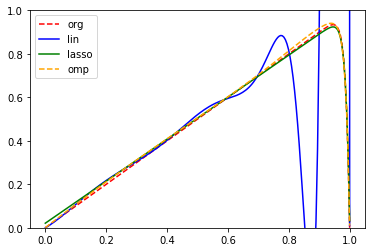

In [67]:
#plot test
x_sorted = np.sort(x)
X_test  = x_sorted.reshape([-1,1])
#print(X_test)
test_lin_pred = lin_poly.predict(t.reshape([-1,1]))
test_lasso_pred = lasso_poly.predict(t.reshape([-1,1]))
test_omp_pred = omp_poly.predict(t.reshape([-1,1]))
#print(X_test.shape,test_lin_pred.shape)
#plt.xlim([0,0.25])
plt.ylim([0,1])
plt.plot(t,ty,c="red",linestyle="--",label="org")
#plt.scatter(X_test,test_lin_pred,label="lin",c="blue")
plt.plot(t.reshape([-1,1]),test_lin_pred,label="lin",c="blue")
#plt.scatter(X_test,test_lasso_pred.reshape(len(X_test)),label="lasso",c="green")
plt.plot(t.reshape([-1,1]),test_lasso_pred,label="lasso",c="green",linestyle="-")
#plt.scatter(X_test,test_omp_pred.reshape(len(X_test)),label="omp",c="orange")
plt.plot(t.reshape([-1,1]),test_omp_pred,label="omp",c="orange",linestyle="--")
plt.legend()
plt.show()

-0.00032754033932436144
[  0.82874159   3.97299785 -15.18326701  -3.39848415  68.80299935
 -13.50793961 -78.97559684 -58.20776879   6.50526491  60.76673375
  80.07452323  66.6038362   34.2411352   -2.61311451 -33.98008613
 -55.00922508 -64.79797771 -64.80554865 -57.53028833 -45.63008474
 -31.44074112 -16.7783548   -2.91465745   9.358503    19.63010806
  27.76766355  33.82706907  37.98034779  40.46156752  41.52874261
  41.43861525  40.43120124  38.72137556  36.49529733  33.9099929
  31.09486777  28.1542826   25.17060913  22.2073882   19.3123596
  16.52023556  13.85515747  11.33281958   8.96226944   6.74741042
   4.68823842   2.78184739   1.02323746  -0.59404279  -2.07739188
  -3.43476405  -4.67436985  -5.80445096  -6.83311418  -7.76821232
  -8.61726201  -9.3873901  -10.08530206 -10.71726717 -11.28911615
 -11.80624797 -12.2736432  -12.69588186 -13.07716421 -13.42133318
 -13.73189772 -14.01205618 -14.26471938 -14.49253293 -14.69789859
 -14.88299457 -15.04979451 -15.20008536 -15.33548388 -

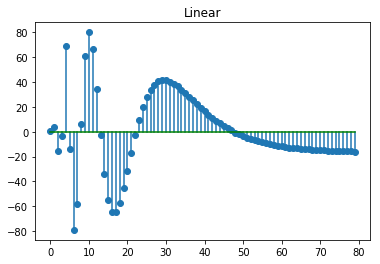

In [79]:
#Linear coef
coef = lin.coef_
idx,=coef.nonzero()
plt.stem(idx, coef[idx], basefmt='g-')
plt.title('Linear')

print(lin.intercept_)
print(lin.coef_)

0.021103807038022337
[ 0.96691545  0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.1915024
 -0.40251689 -0.36225644]
500000


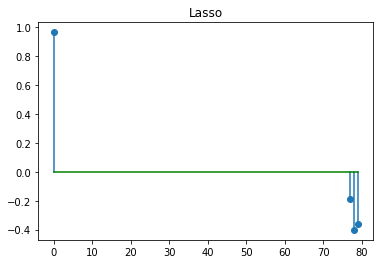

In [80]:
#Lasso coef
coef = lasso.coef_
idx,=coef.nonzero()
plt.stem(idx, coef[idx], basefmt='g-')
plt.title('Lasso')

print(lasso.intercept_)
print(lasso.coef_)
print(lasso.n_iter_)

0.00036617819726159073
[ 1.08972084 -0.17437308  0.          0.          0.          0.23650188
  0.          0.          0.          0.          0.          0.
  0.         -0.20578383  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.93669441]
5


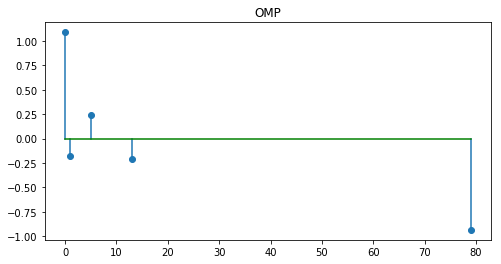

In [81]:
#OMP coef
coef = omp.coef_
idx, = coef.nonzero()
plt.figure(figsize=(8,4))
plt.stem(idx, coef[idx], basefmt='g-')
plt.title('OMP')
print(omp.intercept_)
print(omp.coef_)
print(omp.n_iter_)